In [5]:
import numpy as np

In [6]:
def d3(oz, d1):
    return oz-d1

In [7]:
def theta2(ox, oy, a1, a2, sign):
    D = (ox**2 + oy**2 - a1**2 - a2**2)/(2*a1*a2)
    return np.arctan2(sign*np.sqrt(1-D),D)

In [8]:
def theta1(ox, oy, a1, a2, theta2):
    return np.arctan2(oy,ox) - np.arctan2((a2*np.sin(theta2)),(a1+a2*np.cos(theta2)))

In [9]:
def rad_to_deg(rad):
    return rad*180/np.pi

In [10]:
def p_to_q(point, sign):
    d1=1
    a1=1
    a2=1
    
    x, y, z = point
    
    q3 = d3(z, d1)
    q2 = theta2(x, y, a1, a2, sign)
    q1 = theta1(x, y, a1, a2, q2)    
    return np.array([rad_to_deg(q1), rad_to_deg(q2), q3])

In [11]:
points = [
    [1, 1, 1],
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1],
    [0, 1, 0],
]

print("        q1           q2           q3")
print("Positive solutions:")
for segment, point in enumerate(points):
    q1, q2, q3 = p_to_q(point, 1)
    print(f"p{segment}:    "+"{:0.4f}      {:.4f}      {:.4f}".format(q1, q2, q3))
    
print("Negative solutions:")
for segment, point in enumerate(points):
    q1, q2, q3 = p_to_q(point, -1)
    print(f"p{segment}:    "+"{:0.4f}      {:.4f}      {:.4f}".format(q1, q2, q3))

        q1           q2           q3
Positive solutions:
p0:    0.0000      90.0000      0.0000
p1:    -56.1038      112.2077      0.0000
p2:    -56.1038      112.2077      -1.0000
p3:    33.8962      112.2077      0.0000
p4:    33.8962      112.2077      -1.0000
Negative solutions:
p0:    90.0000      -90.0000      0.0000
p1:    56.1038      -112.2077      0.0000
p2:    56.1038      -112.2077      -1.0000
p3:    146.1038      -112.2077      0.0000
p4:    146.1038      -112.2077      -1.0000


In [12]:
point_sequence = [
    points[0],
    points[1],
    points[2],
    points[1],
    points[3],
    points[4],
    points[3],
    points[0],
]
poses = np.array([p_to_q(point, 1) for point in point_sequence])
poses

array([[  0.        ,  90.        ,   0.        ],
       [-56.10382715, 112.2076543 ,   0.        ],
       [-56.10382715, 112.2076543 ,  -1.        ],
       [-56.10382715, 112.2076543 ,   0.        ],
       [ 33.89617285, 112.2076543 ,   0.        ],
       [ 33.89617285, 112.2076543 ,  -1.        ],
       [ 33.89617285, 112.2076543 ,   0.        ],
       [  0.        ,  90.        ,   0.        ]])

In [13]:
import matplotlib.pyplot as plt

In [14]:
def f(pn, dp, t):
    return pn + 3*dp*t**2 - 2*dp*t**3

In [15]:
def df(dp, t):
    return 6*dp*t - 6*dp*t**2

In [16]:
def ddf(dp, t):
    return 6*dp - 12*dp*t

In [17]:
t = np.linspace(0, 1, 100)

In [18]:
def make_paths(poses, t):
    path_pos = []
    path_speed = []
    path_accel = []
    for i in range(len(poses)-1):
        dp = poses[i+1] - poses[i]
        pn = poses[i]
        path_pos.append(f(pn, dp, t))
        path_speed.append(df(dp, t))
        path_accel.append(ddf(dp, t))
    return np.array([path_pos, path_speed, path_accel])

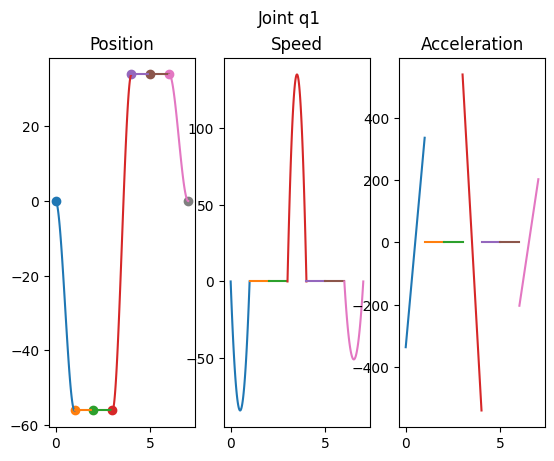

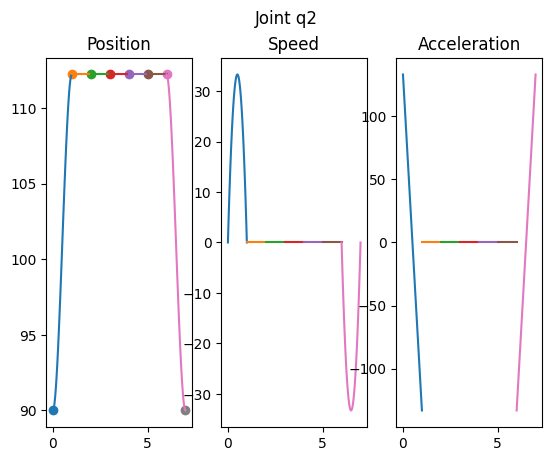

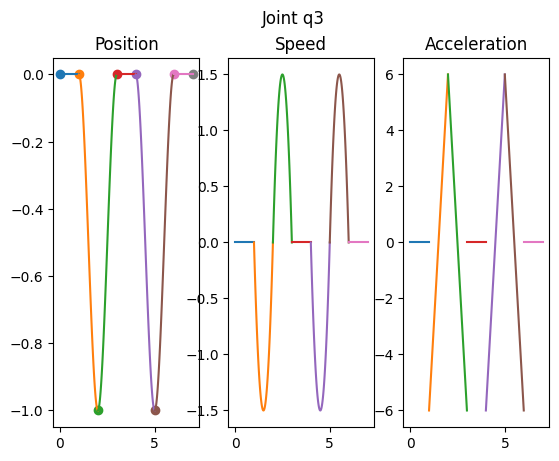

In [19]:
num_joints = len(poses[0])
for joint in range(num_joints):
    fig, ax = plt.subplots(1, 3)
    fig.suptitle(f"Joint q{joint+1}")
    joint_paths = make_paths(poses[:,joint], t)
    joint_position_segments, joint_speed_segments, joint_accel_segments = joint_paths
    for segment in range(len(joint_position_segments)):
        ax[0].set_title("Position")
        ax[0].plot(segment+t, joint_position_segments[segment])
        ax[1].set_title("Speed")
        ax[1].plot(segment+t, joint_speed_segments[segment])
        ax[2].set_title("Acceleration")
        ax[2].plot(segment+t, joint_accel_segments[segment])
    for pose in range(len(poses)):
        ax[0].scatter(pose, poses[pose, joint])